<a href="https://colab.research.google.com/github/apcspoli/Projeto-1---Fun-es-de-Ativa-o/blob/main/Projeto_1_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importar as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Modelo sequencial (camadas empilhadas)
from tensorflow.keras.layers import Dense, Flatten, GaussianNoise  # Tipos de camadas utilizadas
from tensorflow.keras.datasets import mnist  # Dataset MNIST (imagens de dígitos escritos à mão)
from tensorflow.keras.utils import to_categorical  # Para converter rótulos em codificação one-hot
from sklearn.metrics import confusion_matrix  # Para gerar matriz de confusão

import seaborn as sns  # Biblioteca para visualização de dados (gráficos)
import matplotlib.pyplot as plt  # Biblioteca para gráficos
import numpy as np  # Biblioteca para operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados tabulares

In [12]:
# 1. Carregar o conjunto de dados MNIST (imagens 28x28 de dígitos de 0 a 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalizar os dados dividindo por 255 (valores ficarão entre 0 e 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Transformar os rótulos (0 a 9) em vetores one-hot para classificação multiclasses
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Definir a taxa de aprendizado e criar o otimizador Adam
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [13]:
# 5. Criar um callback para registrar a taxa de aprendizado em cada época (época = uma passagem pelo dataset)
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.lrs = []  # Lista para armazenar os valores
    def on_epoch_end(self, epoch, logs=None):
        # Armazena o valor atual da learning rate ao final de cada época
        lr = self.model.optimizer.learning_rate
        self.lrs.append(tf.keras.backend.get_value(lr))

lr_logger = LearningRateLogger()  # Instancia o callback


In [14]:
# 6. Construção do modelo neural (sem ruído nas entradas)
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Achata a imagem de 28x28 para vetor de 784 posições
    Dense(128, activation='tanh'),         # Camada densa com 128 neurônios e função de ativação tanh
    Dense(64, activation='tanh'),          # Outra camada densa com 64 neurônios
    Dense(10, activation='softmax')        # Camada de saída com 10 neurônios (uma para cada dígito)
])

In [15]:
# 5. Compilar o modelo (definir como o modelo será treinado)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 6. Treinamento do modelo com dados limpos (sem ruído)
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),  # Usar dados de teste para validação
                    epochs=5,                         # Número de épocas de treinamento
                    batch_size=16,                     # Tamanho do lote (mini-batch)
                    callbacks=[lr_logger])             # Adiciona o callback para registrar learning rate

# 7. Avaliar o modelo com dados de teste (sem ruído)
loss_clean, acc_clean = model.evaluate(x_test, y_test)
print(f"\n[Teste LIMPO] Acurácia: {acc_clean * 100:.2f}%")

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8924 - loss: 0.3718 - val_accuracy: 0.9606 - val_loss: 0.1372
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9663 - loss: 0.1141 - val_accuracy: 0.9671 - val_loss: 0.1044
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9642 - val_loss: 0.1109
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9831 - loss: 0.0551 - val_accuracy: 0.9746 - val_loss: 0.0861
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9869 - loss: 0.0400 - val_accuracy: 0.9709 - val_loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1184

[Teste LIMPO] Acurácia: 97.09%


In [17]:
# 8. Adicionar ruído às imagens de teste
noise_factor = 0.4  # Define a intensidade do ruído
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  # Garante que os valores fiquem entre 0 e 1

# 10. Avaliar o modelo com as imagens ruidosas
loss_noisy_input, acc_noisy_input = model.evaluate(x_test_noisy, y_test)
print(f"[Teste COM RUÍDO na imagem] Acurácia: {acc_noisy_input * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4400 - loss: 3.1464
[Teste COM RUÍDO na imagem] Acurácia: 45.49%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


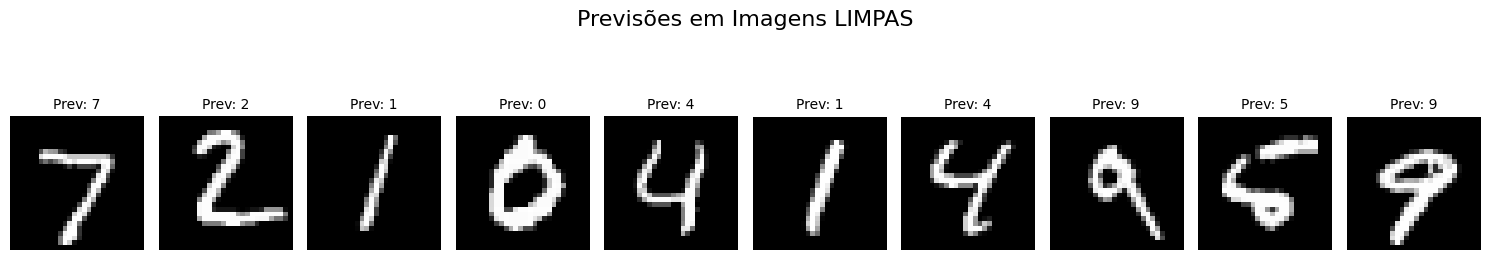

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


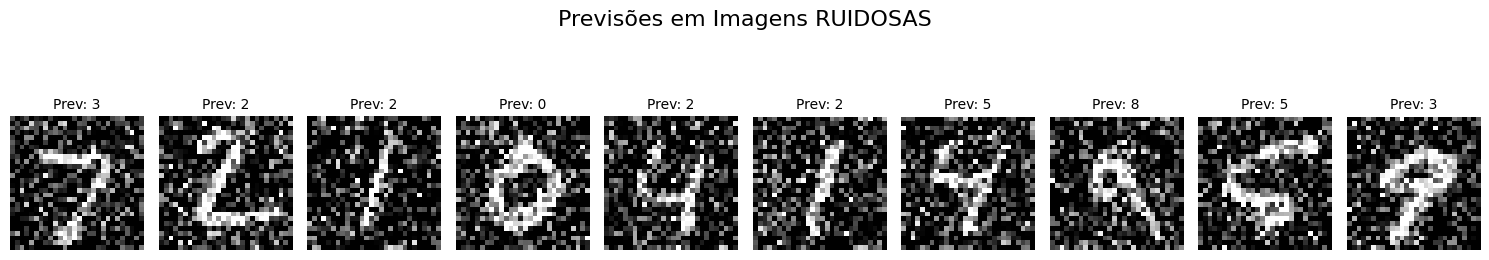

In [18]:
# 11. Visualizar N primeiras imagens limpas com suas respectivas previsões
N = 10
preds_clean = model.predict(x_test[:N])                 # Previsões nas N primeiras imagens limpas
labels_clean = np.argmax(preds_clean, axis=1)           # Obtém a classe prevista

plt.figure(figsize=(15, 3))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Prev: {labels_clean[i]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Previsões em Imagens LIMPAS", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

# 12. Visualizar N primeiras imagens ruidosas com suas respectivas previsões
preds_noisy = model.predict(x_test_noisy[:N])
labels_noisy = np.argmax(preds_noisy, axis=1)

plt.figure(figsize=(15, 3))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.title(f"Prev: {labels_noisy[i]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Previsões em Imagens RUIDOSAS", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

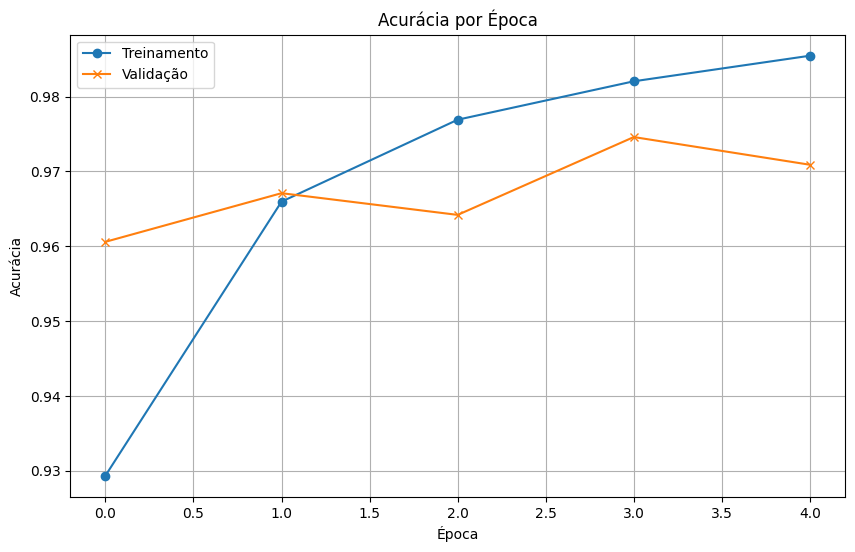

In [19]:
# 13. Plotar gráfico da acurácia durante o treinamento (época por época)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Treinamento', marker='o')
plt.plot(history.history['val_accuracy'], label='Validação', marker='x')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


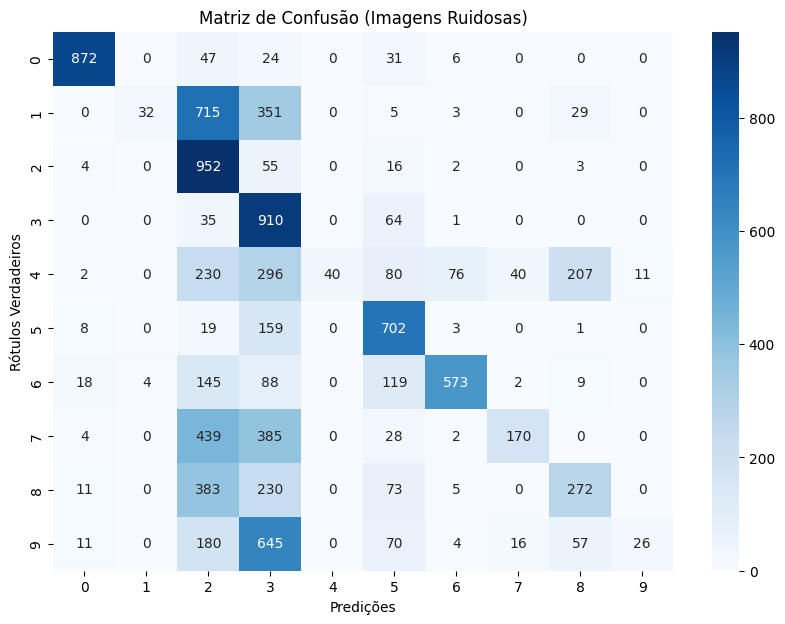


Comparativo de Acurácias:
               Cenário  Acurácia de Teste (%)
0            Sem Ruído                  97.09
1  Com Ruído na Imagem                  45.49
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


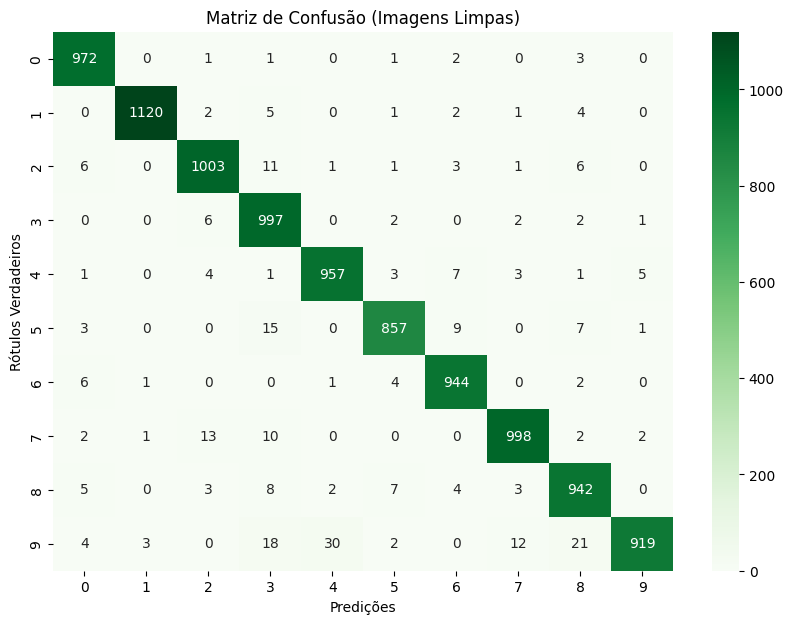

In [20]:
# 14. Obter as previsões nas imagens ruidosas
predictions = model.predict(x_test_noisy)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 15. Gerar e exibir a matriz de confusão (imagens ruidosas)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matriz de Confusão (Imagens Ruidosas)')
plt.xlabel('Predições')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

# 16. Comparar acurácias com e sem ruído
df_comparativo = pd.DataFrame({
    'Cenário': ['Sem Ruído', 'Com Ruído na Imagem'],
    'Acurácia de Teste (%)': [acc_clean * 100, acc_noisy_input * 100]
})
print("\nComparativo de Acurácias:")
print(df_comparativo)

# 17. Gerar matriz de confusão para os dados limpos
pred_clean = model.predict(x_test)
pred_labels_clean = np.argmax(pred_clean, axis=1)
true_labels_clean = np.argmax(y_test, axis=1)

cm_clean = confusion_matrix(true_labels_clean, pred_labels_clean)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_clean, annot=True, fmt="d", cmap='Greens', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matriz de Confusão (Imagens Limpas)')
plt.xlabel('Predições')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

In [23]:
# 21. Extrair as acurácias do treinamento por época
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']

# 22. Criar um DataFrame com as acurácias
df_accuracy = pd.DataFrame({
    'Época': epochs,
    'Acurácia de Treinamento': train_accuracy,
    'Acurácia de Validação': history.history['val_accuracy']
})

# 23. Exibir a tabela
print(df_accuracy)

   Época  Acurácia de Treinamento  Acurácia de Validação
0      1                 0.929350                 0.9606
1      2                 0.965967                 0.9671
2      3                 0.976917                 0.9642
3      4                 0.982050                 0.9746
4      5                 0.985467                 0.9709
